# Unit 9 Lecture 2 - Artificial Intelligence: Supervised Learning

ESI4628: Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula, Mostafa Saeidi, Madeline Schiappa, and Brett Belcher. 
https://github.com/igaribay/DSSwithPython/blob/master/DSS-Week09/Notebook/DSS-Unit09-Lecture02.2018.ipynb

## Notebook Learning Objectives
After studying this notebook students should be able to:
- objective

# Overview

<h3>Model Selection</h3>
<p style="font-size: 16px">As mentioned before, the value of $k$ is a hyperparameter that can be tuned. Because of this, it is important to use cross validation to pick the best $k$, or the $k$ that resulted in the highest accuracy.</p>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import neighbors
from sklearn import datasets
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt

# we will use a smaller dataset for example sake
ofname = open('../Data/dataset_small.pkl','rb') 
(X,y) = pickle.load(ofname)

knn = neighbors.KNeighborsClassifier(n_neighbors=11)

PRC = 0.1
acc_r=np.zeros((10,20))
for i in np.arange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC)
    for k in np.arange(20):
        knn = neighbors.KNeighborsClassifier(n_neighbors=k+1)
        knn.fit(X_train,y_train)
        y_pred= knn.predict(X_test)
        acc_r[i][k] = metrics.accuracy_score(y_pred, y_test)

plt.figure(figsize=(10,8))
plt.boxplot(acc_r);
for i in np.arange(10):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['{}k'.format(k+1) for k in np.arange(20)])
plot_ = plt.ylabel('Accuracy')
plt.show()

<Figure size 1000x800 with 1 Axes>

<p style="font-size: 16px">As you can from the plot, varying the $k$ hyperparameter can change the results. This plot also demonstrates how randomized subsets of the data can change the final model parameters and overall success of the model as well. This is why it is important to undergo the process of model selection.</p>

<h2>Support Vector Machines </h2>
<p style="font-size: 16px">A support vector machine is a learning algorithm with the goal of learning a linear boundary between classes. The model learns the boundary via <i>support vectors</i> which are example points in the feature space, learning a boundary that creates the largest gap possible between the support vectors in each category. The distance of a point $\mathbf{x}\in\mathbf{R}^d$ to the hyperplane $\pi$ where $\pi$ is a combination of variables $\pi\equiv a^Tx+b=0$ is 
$$d(x,\pi)=\frac{a^Tx+b}{\Vert a \Vert_2}$$

Our goal is to find the seperating hyperplane with the maximum margin with maximum distance between elements in different classes.

SVM therefore is:
$$\text{minimize } \quad \frac{\Vert a\Vert_2}{2}+C\sum_{i=1}^N\xi_i$$
$$\text{subject to } \quad y_i(a^Tx_ib)\geq 1-\xi_i, i=1 \cdots N $$
$$\xi\geq 0$$

<li style="font-size: 16px">$C$ is a trade-off parameter that balances the rates of margin and misclassification, with larger values giving more importance to error.</li>
<li style="font-size: 16px">$\xi$ loosley represents error, and we want it as close to 0 as possible. </li> 


<p style="font-size: 16px">We will use sklearn to train an svm model, for more information, visit <a href='http://scikit-learn.org/stable/modules/svm.html'>the svm documentation</a>.</p>

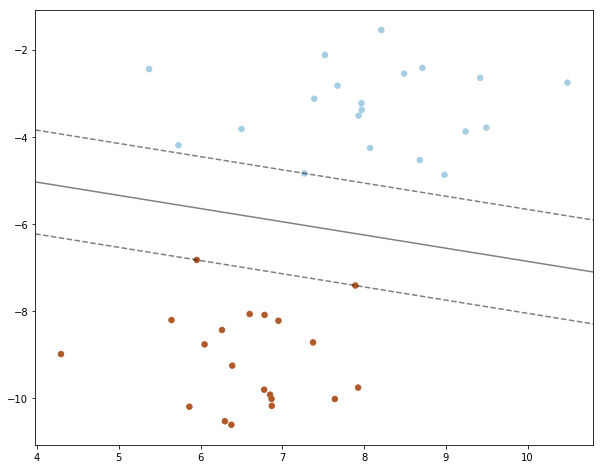

In [2]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# we create 40 separable points
X_blob, y_blob = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = SVC(kernel='linear')
clf.fit(X_blob, y_blob)

plt.figure(figsize=(10,8))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
plot_ = ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')

<p style="font-size: 16px">An <a href='http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html'>example</a> provided by sklearn is visualized above. The circled points are the support vectors, the dashed lines represent the margin and the solid line is the linear decision boundary. Although this example shows a <i>linear kernel</i>, the model could use instead a <i>polynomial</i> kernel or <i>radial based function kernel</i>, allowing for non-linear decision boundaries. </p> 

<p style="font-size: 16px">Now we will try our own SVM model with our previous small dataset.</p>

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import *
import pandas as pd

# Split the data into training and testin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=y.size)  
print('Training shape: {}, training targets shape: {}'.format(X_train.shape, y_train.shape))
print('Testing shape: {}, testing targets shape: {}'.format(X_test.shape, y_test.shape))

# Create SVC instance and call fit on our training dataset
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on our training and testing dataset to evaluate the results
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

results = dict()
train_cm = confusion_matrix(y_train, y_pred_train)
results['Training'] = {'classification_acc': accuracy_score(y_pred_train, y_train),
                      'TP': train_cm[0,0], 'FP': train_cm[0,1],
                      'FN': train_cm[1,0], 'TN': train_cm[1,1]}

test_cm = confusion_matrix(y_test, y_pred_test)
results['Test'] = {'classification_acc': accuracy_score(y_pred_test, y_test),
                      'TP': test_cm[0,0], 'FP': test_cm[0,1],
                      'FN': test_cm[1,0], 'TN': test_cm[1,1]}
pd.DataFrame(data=results)

Training shape: (2898, 15), training targets shape: (2898,)
Testing shape: (1242, 15), testing targets shape: (1242,)


,Test,Training
FN,197.000000,1.000000
FP,0.000000,0.000000
TN,22.000000,543.000000
TP,1023.000000,2354.000000
classification_acc,0.841385,0.999655


<p style="font-size: 16px">Unfortunately, because our feature vector is 15 variables long, plotting the decision boundary would be computationally complex and is beyond the scope of this course. What we do observe is that the training accuracy is higher than the testing accuracy, as expected.</p>

<h2>Random Forest </h2>
<p style="font-size: 16px">The random forest algorithm is a type of ensemble method. Ensemble methods combine classifiers built with a given learning algorithm, such as majority voting, the more diverse the classifiers the better the performance (see <a href='http://scikit-learn.org/stable/modules/ensemble.html'>sklearn ensemble</a>). Decision trees are the most popular ensemble method with the basic idea of how do we <i>partition</i> or <i>split</i> the space and what model should we use for each split. A good description from Wikipedia: <br><br><i>"In a decision tree each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). A node that has no children is a leaf."</i></p>
<p style="font-size: 16px">Random Forest is a particular type of decision tree that only uses subsets of the data at each split, rather than using the entire dataset. Let us use our original data set and build a random forest model. But first, we need to do a little more data cleaning.</p>

In [4]:
df_lend = pd.read_csv('../Data/LoanStats3a.csv', skiprows=1, low_memory=False)
df_lend[['term', 'int_rate', 'emp_length', 'home_ownership']].head()

,term,int_rate,emp_length,home_ownership
0,36 months,10.65%,10+ years,RENT
1,60 months,15.27%,< 1 year,RENT
2,36 months,15.96%,10+ years,RENT
3,36 months,13.49%,10+ years,RENT
4,60 months,12.69%,1 year,RENT


<p style="font-size: 16px">The above table shows some data type issues we will have to deal with:
<li style="font-size: 16px">Interest rate (int_rate) is a string and we need it to be a float</li>
<li style="font-size: 16px">Term and emp_length are categorical strings, we need to vectorize the results taking into account the order relationship</li>
<li style="font-size: 16px">Home ownership (home_ownership) is a string and needs to be vectorized</li>
</p>

In [20]:
# create a function to apply to all the values in the dataframe series
def clear_percent (row):
    try:
        d = float(row['int_rate'][:-1])/100.
    except:
        d = None
    return d

# now apply the function using a lambda function that iterates through each value in the series
df_lend['int_rate_clean'] = df_lend.apply (lambda row: clear_percent(row), axis=1)

# repeat for the other variables
def clear_term (row):
    try:
        if row['term']==' 36 months':
            d = 1
        else:
            if row['term']==' 60 months':
                d = 2
            else:
                if np.isnan(row['term']):
                    d = None
    except:
        d = None
    return d

df_lend['term_clean'] = df_lend.apply (lambda row: clear_term(row),axis=1)

def clean_emp_length(argument):
    switcher = {
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10,
        '< 1 year': 0,
        'n/a':None,
    }
    try:
        d = switcher[argument['emp_length']]    
    except:
        d = None
    return d

df_lend['emp_length_clean'] =df_lend.apply (lambda row: clean_emp_length(row),axis=1)
df_lend[['term', 'term_clean', 'int_rate', 'int_rate_clean', 'emp_length', 'emp_length_clean']].head()

,term,term_clean,int_rate,int_rate_clean,emp_length,emp_length_clean
0,36 months,1.0,10.65%,0.1065,10+ years,10.0
1,60 months,2.0,15.27%,0.1527,< 1 year,0.0
2,36 months,1.0,15.96%,0.1596,10+ years,10.0
3,36 months,1.0,13.49%,0.1349,10+ years,10.0
4,60 months,2.0,12.69%,0.1269,1 year,1.0


<p style="font-size: 16px">Sklearn has tools that can help us convert home ownership into several binary variables representing each different category possible.</p>

In [21]:
from sklearn.feature_extraction import DictVectorizer

comb_dict = df_lend[['home_ownership']].to_dict(orient='records')
vec = DictVectorizer()
home = 2*vec.fit_transform(comb_dict).toarray()-1
df_vector = pd.DataFrame(home[:,1:])
vector_columns = vec.get_feature_names()
df_vector.columns = vector_columns[1:]
df_vector.index = df_lend.index

df_lend = df_lend.join(df_vector)
df_vector.head()

,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,-1.0,-1.0,-1.0,-1.0,1.0
1,-1.0,-1.0,-1.0,-1.0,1.0
2,-1.0,-1.0,-1.0,-1.0,1.0
3,-1.0,-1.0,-1.0,-1.0,1.0
4,-1.0,-1.0,-1.0,-1.0,1.0


<p style="font-size: 16px">Now that we have cleaned up the incorrect data types, we will drop the old columns and remove any other unwanted columns. We will also define our target variables more clearly and remove rows with missing values.</p>

In [22]:
df_lend = df_lend.drop(['term','int_rate','emp_length','home_ownership', 'funded_amnt_inv'],axis=1)

y = df_lend['targets'].values>0.05
print('Undefined values: {}'.format(np.sum(np.where(np.isnan(y),1,0)))) # np.where(condition, val if true, val if false)

X = df_lend.drop(['targets'], axis=1).values
df_lend = df_lend.drop(['targets'], axis=1)
idx_rmv = np.where(np.isnan(y))[0] # get indexes that are missing values 

# delete the rows with missing values using the indexes above
y = np.delete(y, idx_rmv) 
X = np.delete(X, idx_rmv,axis=0)
print('y shape: {}, x shape: {}'.format(y.shape, X.shape))

KeyError: 'targets'

<p style="font-size: 16px">We received an error due to NaN values, let's explore what is going on.</p>

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

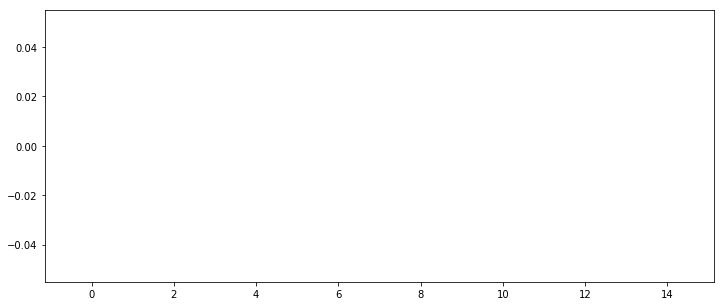

In [23]:
nan_feats=np.sum(np.where(np.isnan(X),1,0),axis=0)
plt.bar(np.arange(len(nan_feats)), nan_feats)
fig = plt.gcf()
fig.set_size_inches((12,5))
nan_feats

Column being dropped: sub_grade
X shape: (4140L, 14L)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

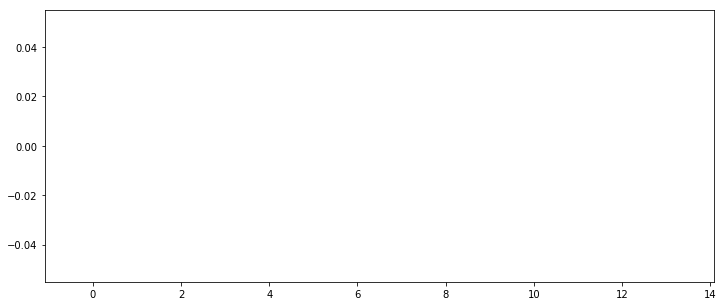

In [24]:
print('Column being dropped: {}'.format(df_lend.columns[6]))
df_lend = df_lend.drop(df_lend.columns[6], axis=1)
X=np.hstack((X[:,:6], X[:,7:]))

print("X shape: {}".format(X.shape))
#Check now
nan_feats=np.sum(np.where(np.isnan(X),1,0),axis=0)
plt.bar(np.arange(len(nan_feats)),nan_feats)
fig = plt.gcf()
fig.set_size_inches((12,5))
nan_feats

Column being dropped: loan_status
X shape: (4140L, 13L)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

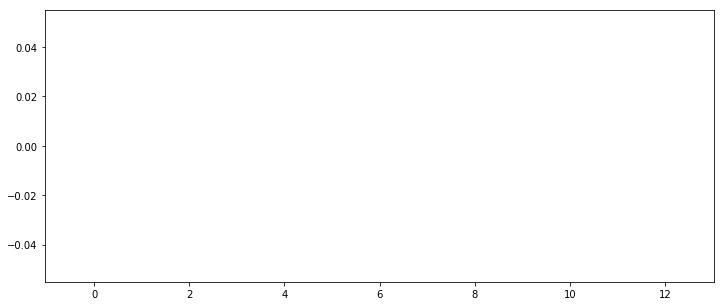

In [25]:
print('Column being dropped: {}'.format(df_lend.columns[10]))
df_lend = df_lend.drop(df_lend.columns[10], axis=1)
X = np.hstack((X[:,:10], X[:,11:]))
print('X shape: {}'.format(X.shape))

nan_feats=np.sum(np.where(np.isnan(X),1,0),axis=0)
plt.bar(np.arange(len(nan_feats)),nan_feats)
fig = plt.gcf()
fig.set_size_inches((12,5))
nan_feats

<h3>Fitting the Model</h3>

In [26]:
from sklearn.ensemble import RandomForestClassifier

idx_rmv = np.where(np.isnan(X).any(axis=1))[0] # get indexes that are missing values 

# delete the rows with missing values using the indexes above
y = np.delete(y, idx_rmv) 
X = np.delete(X, idx_rmv,axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=y.size)  
print('Training shape: {}, training targets shape: {}'.format(X_train.shape, y_train.shape))
print('Testing shape: {}, testing targets shape: {}'.format(X_test.shape, y_test.shape))

# Create SVC instance and call fit on our training dataset
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on our training and testing dataset to evaluate the results
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

results = dict()
train_cm = confusion_matrix(y_train, y_pred_train)
results['Training'] = {'classification_acc': accuracy_score(y_pred_train, y_train),
                      'TP': train_cm[0,0], 'FP': train_cm[0,1],
                      'FN': train_cm[1,0], 'TN': train_cm[1,1]}

test_cm = confusion_matrix(y_test, y_pred_test)
results['Test'] = {'classification_acc': accuracy_score(y_pred_test, y_test),
                      'TP': test_cm[0,0], 'FP': test_cm[0,1],
                      'FN': test_cm[1,0], 'TN': test_cm[1,1]}
pd.DataFrame(data=results)

Training shape: (2898L, 13L), training targets shape: (2898L,)
Testing shape: (1242L, 13L), testing targets shape: (1242L,)


,Test,Training
FN,176.00000,53.000000
FP,22.00000,0.000000
TN,43.00000,491.000000
TP,1001.00000,2354.000000
classification_acc,0.84058,0.981712


<p style="font-size: 16px">The random forest algorithm measures the relative importance of each feature on the prediction and sklearn provides us with those feature importances. This can help us in feature selection before training more complex models.</p>

In [27]:
results = dict()
importances = rf_model.feature_importances_
for idx, col in enumerate(df_lend.columns):
    results[col] = importances[idx]
df = pd.DataFrame(data=results, index=['results'])
df

IndexError: index 13 is out of bounds for axis 0 with size 13

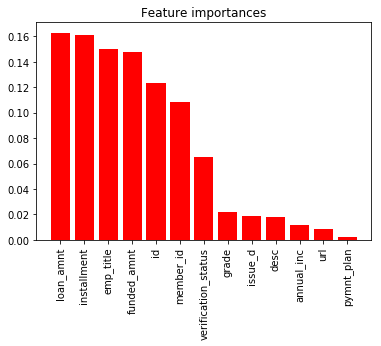

In [28]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
std = np.std([rf_model.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
labels = [df_lend.columns[i] for i in indices]
plt.bar(range(X.shape[1]), importances[indices], label=labels,
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()